# Шаг 1: Парсинг

## Зависимости

In [1]:
import os
import sys
import time

from selenium import webdriver
from selenium.webdriver.common.by import By

import time

from PIL import Image
import requests
from io import BytesIO

import zipfile

from IPython import display

# Парсинг

* По гугл картинкам ищем запрос и парсим $N$ картинок. 
* Каждая из папок - класс. 
* В конце все упаковываем в `zip`

> Хитрый гугл не дает парсить, но мы все-таки умеем)


In [2]:
MAIN_PATH = "E:/DataSets/urfum_hack_1_sem/"

In [3]:
if "data" not in os.listdir(MAIN_PATH):
    os.mkdir(os.path.join(MAIN_PATH, "data"))

if "zips" not in os.listdir(os.path.join(MAIN_PATH, "data")):
    os.mkdir(os.path.join(MAIN_PATH, "data", "zips"))

In [6]:
def get_items(url, folder_name, num=10):

    # проверяем папку
    if folder_name not in os.listdir(os.path.join(MAIN_PATH, "data")):
        os.mkdir(os.path.join(MAIN_PATH, "data", folder_name))


    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    wd = webdriver.Chrome("chromedriver", options=chrome_options)

    wd.get(url)
    # тыкаем на первую картинку (весь поиск по дереву div, т.к. динамические наименования классов)
    wd.find_element(By.XPATH, "/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[1]").click()

    idx = 0
    while idx < num:
        response = None
        img = wd.find_element(By.XPATH, "/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div[2]/div[1]/div[1]/div[2]/div/a/img").get_attribute("src")
        try:
            response = requests.get(img)
        except:
            continue
        if response is not None:
            try:
                img_data = Image.open(BytesIO(response.content))
                # проверяем, что это действительно картинка и фильтруем по размеру
                if int(img_data.size[0]) > 150 and (img_data.size[1]) > 150:
                    img_data.save(os.path.join(MAIN_PATH, "data", folder_name, f"{idx:04d}.png"))
                    display.clear_output()
                    display.display(f"Скачано картинок {idx + 1} / {num}")
                    idx += 1
                    # новая картинка - тык
                wd.find_element(By.XPATH, "/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div[1]/div[2]/div[1]/div/a[2]").click()
            except:
                display.clear_output()
                display.display(f"Скачано картинок {idx + 1} / {num}, ждем...")
                time.sleep(20)
        wd.find_element(By.XPATH, "/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div[1]/div[2]/div[1]/div/a[2]").click()
            

    display.display(f"Запаковываю картинки...")
        
    with zipfile.ZipFile(os.path.join(MAIN_PATH, 'data', 'zips', folder_name + ".zip"), 'w') as zip_obj:
        for f in os.listdir(os.path.join(MAIN_PATH, "data", folder_name)):
            zip_obj.write(os.path.join(MAIN_PATH, "data", folder_name, f))
    return 

## Автосбор датасета

In [7]:
artists = [
    ("https://www.google.com/search?q=%D1%85%D0%B0%D0%B8%D0%BC+%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D1%8B+%D0%B6%D0%B8%D0%B2%D0%BE%D0%BF%D0%B8%D1%81%D1%8C&tbm=isch&ved=2ahUKEwjm6P3XlM_8AhWRuIsKHbb2CMsQ2-cCegQIABAA&oq=%D1%85%D0%B0%D0%B8%D0%BC+%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D1%8B+%D0%B6%D0%B8%D0%B2%D0%BE%D0%BF%D0%B8%D1%81%D1%8C&gs_lcp=CgNpbWcQAzoECCMQJ1CoBFioBGCqBmgAcAB4AIABO4gBaJIBATKYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=Lt_GY-aZL5HxrgS27aPYDA&bih=937&biw=1920", "Дега"),
    ("https://www.google.com/search?q=%D1%81%D1%83%D1%82%D0%B8%D0%BD+%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D1%8B+%D0%B6%D0%B8%D0%B2%D0%BE%D0%BF%D0%B8%D1%81%D1%8C&tbm=isch&ved=2ahUKEwjV37relM_8AhWumIsKHXULCcEQ2-cCegQIABAA&oq=%D1%81%D1%83%D1%82%D0%B8%D0%BD+%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D1%8B+%D0%B6%D0%B8%D0%B2%D0%BE%D0%BF%D0%B8%D1%81%D1%8C&gs_lcp=CgNpbWcQAzoECCMQJ1CzAliADWCKEmgAcAB4AIABOYgB1QGSAQE0mAEAoAEBqgELZ3dzLXdpei1pbWfAAQE&sclient=img&ei=PN_GY9XRFa6xrgT1lqSIDA&bih=937&biw=1920", "Сутин"),
    ("https://www.google.com/search?q=%D0%9C%D0%B0%D1%82%D0%B8%D1%81%D1%81+%D0%BA%D0%B0%D1%80%D1%82%D0%B8%D0%BD%D1%8B+%D0%B6%D0%B8%D0%B2%D0%BE%D0%BF%D0%B8%D1%81%D1%8C&sxsrf=AJOqlzWjU6x3VUHZmDLNICW5bpOWV7HFgg:1674220925497&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjYvqj8ntb8AhWElYsKHUGFAa0Q_AUoAXoECAEQAw", "Матисс"),

]

number = 100
for query, folder in artists:
    get_items(query, folder, number)

'Скачано картинок 100 / 100'

'Запаковываю картинки...'

> Проверям чего накачали

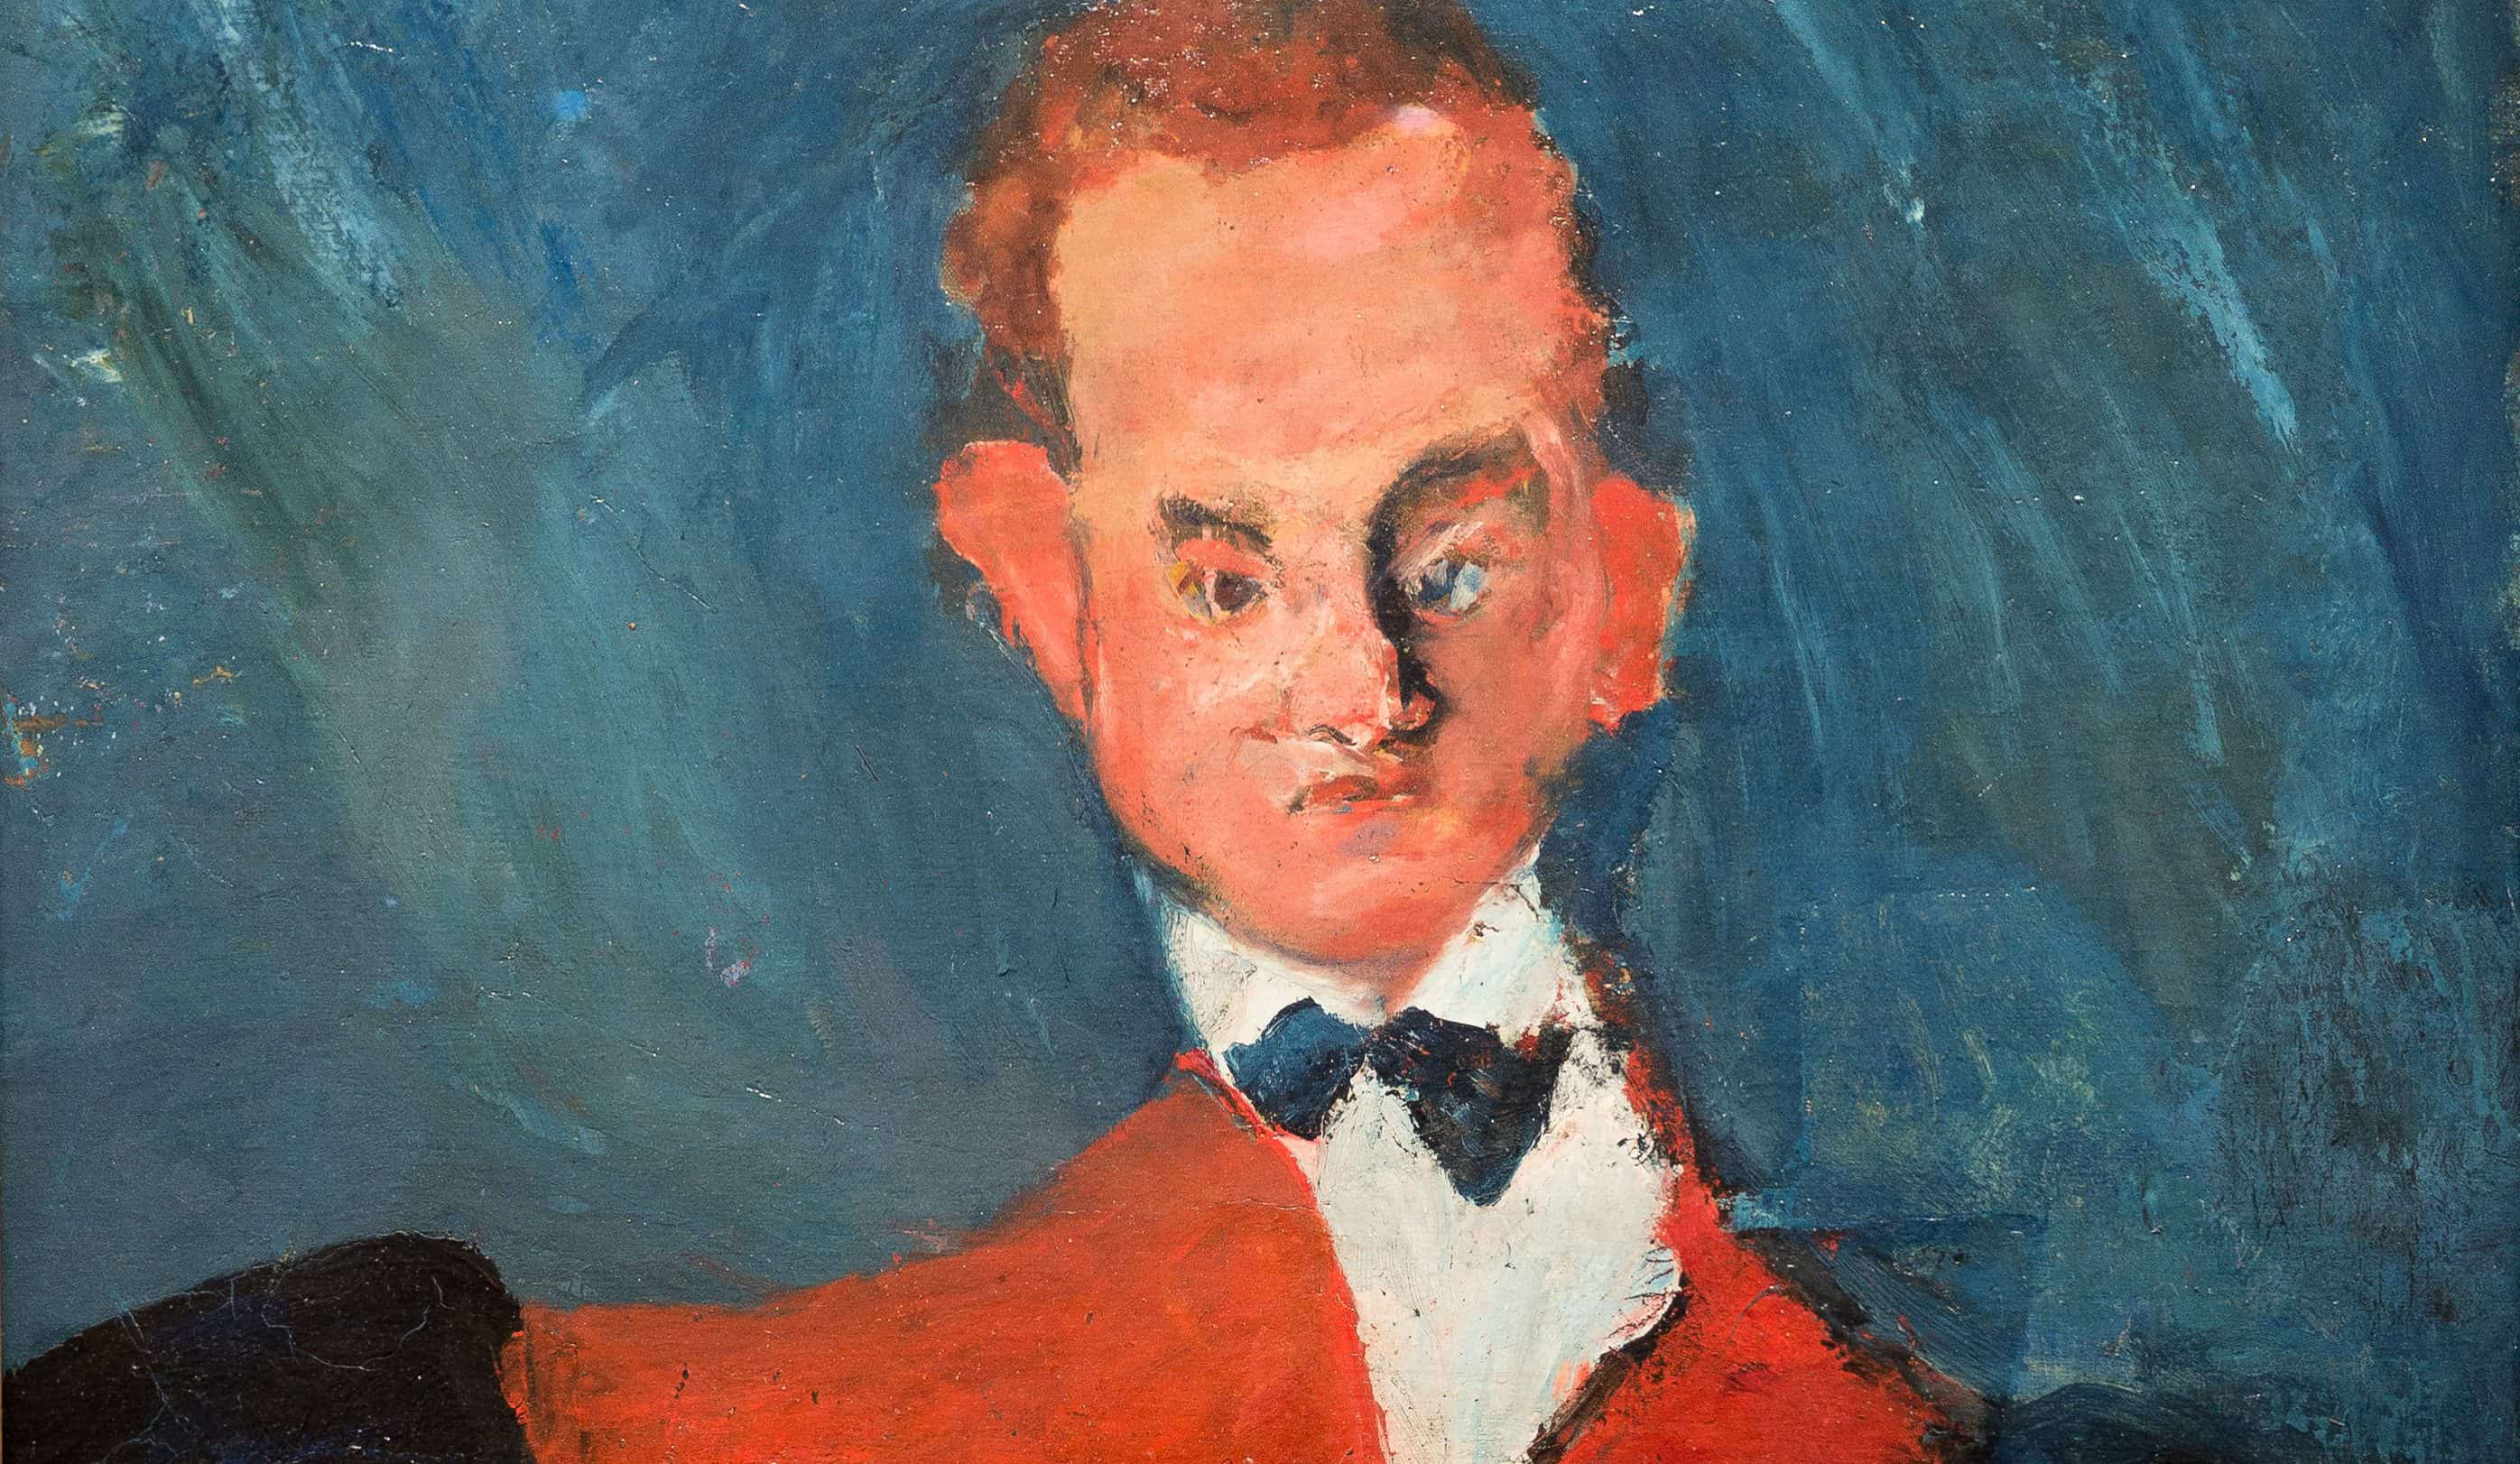

In [8]:
Image.open(os.path.join(MAIN_PATH, "data", "Дега", "0009.png"))

# Готовим датасет к тесту на моделях

> Если есть предварительно скаченные архивы, положить в папку `data/zips`, иначе формируем в п. 1.

* создаем фрейм с основными параметрами картинок
* создаем даталоадеры torch

**ЗАМЕЧАНИЯ**

1. **Так как у колаба урезанные карты да и сессия отпадает часто - картинки пережимаем до "игрушечных" размеров**
2. **Для ускорения обучения (датасет небольшой) все данные поместим в оперативную память**

In [1]:
import os
import numpy as np
import albumentations as A # аугментация картинок

import torch
from torch.utils.data import Dataset, DataLoader

from tqdm.notebook import tqdm

from PIL import Image

import zipfile

%pylab inline
plt.style.use('bmh')

MAIN_PATH = "E:/DataSets/urfum_hack_1_sem/"

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# для удобства работы с лейблами
map_labels = {k: v.replace(".zip", "") for k, v in enumerate(os.listdir(os.path.join(MAIN_PATH, "data", "zips")))}
reverse_map_labels = {v.replace(".zip", ""): k for k, v in enumerate(os.listdir(os.path.join(MAIN_PATH, "data", "zips")))}

img_data, labels = [], []

for zipped_folder in os.listdir(os.path.join(MAIN_PATH, "data", "zips")):
    if zipped_folder != '.ipynb_checkpoints':
        with zipfile.ZipFile(os.path.join(MAIN_PATH, "data", "zips", zipped_folder)) as z:
            for filename in z.namelist():
                if not os.path.isdir(filename):
                    temp_img = np.array(Image.open(z.open(filename)).resize((256, 256)))[..., :3]
                    if len(temp_img.shape) == 3: # если закрались ч/б
                        img_data.append(temp_img) 
                    labels.append(reverse_map_labels[zipped_folder.replace(".zip", "")])

img_data = np.array(img_data).astype(np.float32)
labels = np.array(labels)

print("=" * 5 + " Сводка по датасету " + 5 * "=")
print(f"Всего объектов: {len(labels)}\nПо классам:")
for k, v in map_labels.items():
    print(f"\t{v}: {np.where(labels == k)[0].shape[0]}")
print(f"Занимает памяти: {img_data.size * img_data.itemsize / 1024 / 1024:.2f} Mb")

# превращаем просто метки в one-hot
labels = np.eye(len(map_labels))[labels].astype(np.float32)

===== Сводка по датасету =====
Всего объектов: 500
По классам:
	ван Гог: 100
	Гоген: 100
	Дега: 100
	Матисс: 100
	Сутин: 100
Занимает памяти: 375.00 Mb


## Датасет для классификации

Готовим датасет для задачи многоклассовой классификации (классификация художественных стилей)

In [3]:
class ClassificationDataset(Dataset):
    def __init__(self, images, labels):
        super().__init__()
        self.img_data = images
        self.labels = labels
    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        tensor = torch.tensor(self.img_data[idx]) / 255.
        tensor[..., 0] = (tensor[..., 0] - 0.485) / 0.229
        tensor[..., 1] = (tensor[..., 1] - 0.456) / 0.224
        tensor[..., 2] = (tensor[..., 2] - 0.406) / 0.225
        tensor = tensor.permute(2, 0, 1) # каналы вперед, для свертки
        label = torch.tensor(self.labels[idx])
        return tensor, label

## Датасет для VAE

Готовим датасет для автоэнкодера. Потом внутреннее пространство энкодера можно использовать в качестве эмбеддигов



In [4]:
class VAEDataset(Dataset):
    def __init__(self, images):
        self.img_data = images
        # аугментации
        self.transform = A.Compose([
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.1),
        ])

    def __len__(self):
        return len(self.img_data)

    def __getitem__(self, idx):
        np_transformed = self.transform(image=self.img_data[idx])["image"]
        tensor = torch.tensor(np_transformed) / 255.
        tensor[..., 0] = (tensor[..., 0] - 0.485) / 0.229
        tensor[..., 1] = (tensor[..., 1] - 0.456) / 0.224
        tensor[..., 2] = (tensor[..., 2] - 0.406) / 0.225
        tensor = torch.tensor(np_transformed).permute(2, 0, 1) # каналы вперед, для свертки
        return tensor

# Модели

1. Простой resnet для классиифкации
2. VAE

## Классификатор построение

In [5]:
class ClassificationModel(torch.nn.Module):
    def __init__(self, num_outputs, pretrain=True):
        super().__init__()
        self.feature_encoder = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=pretrain)
        self.flatten = torch.nn.Flatten()
        self.classifier = torch.nn.Linear(1000, num_outputs)
        self.activation = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.feature_encoder(x)
        x = self.flatten(x)
        x = self.classifier(x)
        x = self.activation(x)
        return x

In [6]:
clf = ClassificationModel(labels.shape[1], pretrain=True)
clf.to('cuda')
clf.eval()
print("\n\nКлассификатор загружен и помещен на GPU")

Using cache found in C:\Users\user/.cache\torch\hub\pytorch_vision_v0.10.0




Классификатор загружен и помещен на GPU


Проверяем работу

In [7]:
train_idx, val_idx = [], []
for i in range(5):
    train_idx.extend([x for x in range(i * 100, i * 100 + 90)])
    val_idx.extend([x for x in range(i * 100 + 90, i * 100 + 100)])

In [8]:
# train dataloader
dataset_clf_trian = ClassificationDataset(img_data[train_idx], labels[train_idx])
loader_clf_train = DataLoader(dataset_clf_trian, shuffle=True, batch_size=36) # батч подобран под 3060 (12Гб)
# val dataloader
dataset_clf_val = ClassificationDataset(img_data[val_idx], labels[val_idx])
loader_clf_val = DataLoader(dataset_clf_val, shuffle=True, batch_size=36) # батч подобран под 3060 (12Гб)

In [9]:
clf(next(iter(loader_clf_train))[0].cuda())

tensor([[0.3002, 0.0365, 0.3835, 0.2553, 0.0244],
        [0.2485, 0.0202, 0.0292, 0.6559, 0.0462],
        [0.6374, 0.2014, 0.0597, 0.0466, 0.0549],
        [0.2945, 0.0493, 0.0256, 0.4868, 0.1438],
        [0.3864, 0.2676, 0.0420, 0.1648, 0.1392],
        [0.3747, 0.2443, 0.0988, 0.1968, 0.0854],
        [0.4295, 0.2024, 0.0400, 0.3159, 0.0123],
        [0.6426, 0.1763, 0.0367, 0.0981, 0.0464],
        [0.3692, 0.2122, 0.0962, 0.3165, 0.0060],
        [0.2667, 0.4505, 0.0498, 0.2065, 0.0266],
        [0.4329, 0.0798, 0.1519, 0.0580, 0.2774],
        [0.0728, 0.4962, 0.0343, 0.3552, 0.0415],
        [0.2488, 0.0534, 0.6296, 0.0596, 0.0087],
        [0.1104, 0.6242, 0.2107, 0.0361, 0.0186],
        [0.0828, 0.1521, 0.5281, 0.2234, 0.0136],
        [0.0424, 0.0769, 0.5588, 0.3062, 0.0156],
        [0.5043, 0.0731, 0.0458, 0.3697, 0.0071],
        [0.2004, 0.0257, 0.7031, 0.0414, 0.0293],
        [0.1575, 0.0413, 0.7108, 0.0759, 0.0144],
        [0.4880, 0.2194, 0.1848, 0.0835, 0.0243],


In [10]:
# проверям, что работает jit-scripting
model_scripted = torch.jit.script(clf)
if "models" not in os.listdir():
    os.mkdir("models")
model_scripted.save(os.path.join("models", "clf_test.pt"))

## Классификатор обучение

In [11]:
criterion = torch.nn.BCELoss() # Критерий
optimizer = torch.optim.Adam(clf.parameters(), lr=3e-5)
EPOCHS = 100
SAVE_EVERY = 100

In [12]:
pbar = tqdm(range(EPOCHS))
loss_track, val_loss_track = [], []

with pbar:
    for epoch in range(EPOCHS):
        # train mode
        running_loss = 0.0
        clf.train()
        train_step = 0
        for inputs, label in loader_clf_train:
            optimizer.zero_grad()
            outputs = clf(inputs.cuda())
            loss = criterion(outputs, label.cuda().float())
            loss.backward()
            optimizer.step()
            train_step += 1

            # print statistics
            running_loss += loss.cpu().item()
        loss_track.append(running_loss)
        
        #validation mode
        running_loss = 0.0
        clf.eval()
        val_step = 0
        for inputs, label in loader_clf_val:
            outputs = clf(inputs.cuda())
            loss = criterion(outputs, label.cuda().float())
            val_step += 1

            # print statistics
            running_loss += loss.cpu().detach().item()
        val_loss_track.append(running_loss)
        
        pbar.update(1)
        pbar.set_description(f"loss: {loss_track[-1] / train_step :.4f}, val loss: {val_loss_track[-1] / val_step:.4f}")

        if epoch % SAVE_EVERY == 0 and epoch != 0:
            model_scripted = torch.jit.trace(clf, inputs.cuda())
            model_scripted.save(os.path.join("models", "clf.pt"))

print('Обучились\nСохраняю финальную модель....', end=" ")
model_scripted = torch.jit.trace(clf, inputs.cuda())
model_scripted.save(os.path.join("models", "clf.pt"))
print("готово!")

  0%|          | 0/100 [00:00<?, ?it/s]

Обучились
Сохраняю финальную модель.... готово!


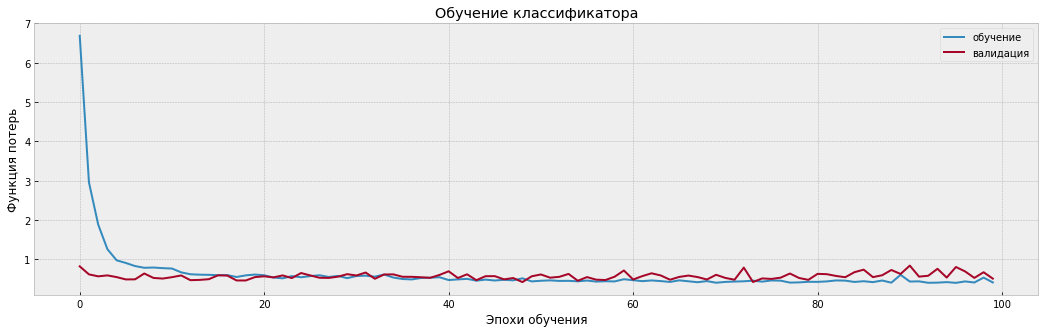

In [13]:
plt.figure(figsize=(18, 5))
plt.plot(loss_track, label="обучение")
plt.plot(val_loss_track, label="валидация")
plt.legend(loc="best")
plt.xlabel("Эпохи обучения")
plt.ylabel("Функция потерь")
plt.title("Обучение классификатора")
plt.show()

### Результаты

In [54]:
#clf_jit = torch.jit.load(os.path.join("models", "clf.pt"))

In [14]:
def apply_clf(img, clf):
    """Для применения к картинкам"""
    temp_img = np.array(img.resize((256, 256)))[..., :3].astype(np.float32)
    if len(temp_img.shape) == 3: # если закрались ч/б
        tensor = torch.tensor(temp_img) / 255.
        tensor[..., 0] = (tensor[..., 0] - 0.485) / 0.229
        tensor[..., 1] = (tensor[..., 1] - 0.456) / 0.224
        tensor[..., 2] = (tensor[..., 2] - 0.406) / 0.225
        tensor = tensor.permute(2, 0, 1).unsqueeze(0)
        return clf(tensor.cuda()).cpu().detach().numpy()
    else:
        print("Модель не работает с ч/б картинками")
        return None

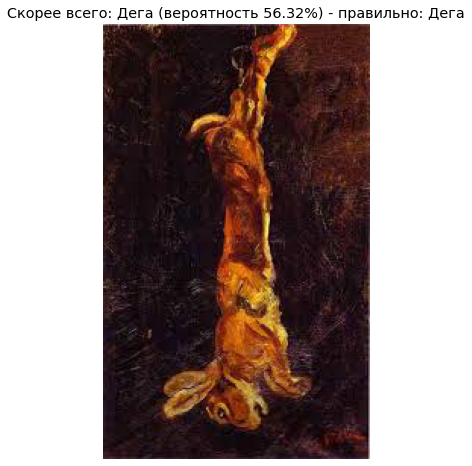

In [28]:
pred = apply_clf(Image.open(os.path.join(MAIN_PATH, "data", "Дега", "0033.png")), clf)

plt.figure(figsize=(15, 8))
plt.imshow(np.uint8(Image.open(os.path.join(MAIN_PATH, "data", "Дега", "0033.png"))))
plt.title(f"Скорее всего: {map_labels[np.argmax(pred)]} (вероятность {pred.max() * 100:.2f}%) - правильно: Дега")
plt.axis('off')
plt.show()

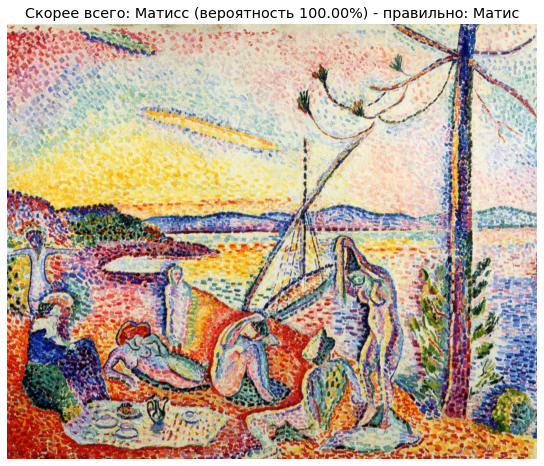

In [16]:
pred = apply_clf(Image.open(os.path.join(MAIN_PATH, "data", "Матисс", "0009.png")), clf)

plt.figure(figsize=(15, 8))
plt.imshow(np.uint8(Image.open(os.path.join(MAIN_PATH, "data", "Матисс", "0009.png"))))
plt.title(f"Скорее всего: {map_labels[np.argmax(pred)]} (вероятность {pred.max() * 100:.2f}%) - правильно: Матис")
plt.axis('off')
plt.show()

### Метрики

In [17]:
from sklearn import metrics

In [18]:
pred_train = []
pred_val = []

for img in tqdm(img_data[train_idx]):
    pred_train.append(apply_clf(Image.fromarray(img.astype(np.uint8)), clf))
for img in tqdm(img_data[val_idx]):
    pred_val.append(apply_clf(Image.fromarray(img.astype(np.uint8)), clf))
    
pred_train = np.array(pred_train).reshape((-1, len(reverse_map_labels)))
pred_val = np.array(pred_val).reshape((-1, len(reverse_map_labels)))

  0%|          | 0/450 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [25]:
reverse_map_labels.keys()

dict_keys(['ван Гог', 'Гоген', 'Дега', 'Матисс', 'Сутин'])

In [22]:
target_names = list(reverse_map_labels.keys())

print("На обученных данных")
print(metrics.classification_report(np.argmax(labels[train_idx], axis=1), np.argmax(pred_train, axis=1), target_names=target_names))
print("\n\nНа валидационных данных")
print(metrics.classification_report(np.argmax(labels[val_idx], axis=1), np.argmax(pred_val, axis=1), target_names=target_names))

На обученных данных
              precision    recall  f1-score   support

     ван Гог       1.00      1.00      1.00        90
       Гоген       1.00      1.00      1.00        90
        Дега       0.79      0.99      0.88        90
      Матисс       1.00      1.00      1.00        90
       Сутин       0.99      0.74      0.85        90

    accuracy                           0.95       450
   macro avg       0.96      0.95      0.95       450
weighted avg       0.96      0.95      0.95       450



На валидационных данных
              precision    recall  f1-score   support

     ван Гог       1.00      0.90      0.95        10
       Гоген       1.00      0.90      0.95        10
        Дега       0.56      0.50      0.53        10
      Матисс       0.71      1.00      0.83        10
       Сутин       0.67      0.60      0.63        10

    accuracy                           0.78        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.79      0.

## VAE построение

не успели построить

In [5]:
import torch.nn.functional as F
from torch import nn

In [291]:
class ResizeConv2d(nn.Module):

    def __init__(self, in_channels, out_channels, kernel_size, scale_factor, mode='nearest'):
        super().__init__()
        self.scale_factor = scale_factor
        self.mode = mode
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=1)

    def forward(self, x):
        x = F.interpolate(x, scale_factor=self.scale_factor, mode=self.mode)
        x = self.conv(x)
        return x

class BasicBlockEnc(nn.Module):

    def __init__(self, in_planes, stride=1):
        super().__init__()

        planes = in_planes*stride

        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        if stride == 1:
            self.shortcut = nn.Sequential()
        else:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = torch.relu(out)
        return out

class BasicBlockDec(nn.Module):

    def __init__(self, in_planes, stride=1):
        super().__init__()

        planes = int(in_planes/stride)

        self.conv2 = nn.Conv2d(in_planes, in_planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(in_planes)

        if stride == 1:
            self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
            self.bn1 = nn.BatchNorm2d(planes)
            self.shortcut = nn.Sequential()
        else:
            self.conv1 = ResizeConv2d(in_planes, planes, kernel_size=3, scale_factor=stride)
            self.bn1 = nn.BatchNorm2d(planes)
            self.shortcut = nn.Sequential(
                ResizeConv2d(in_planes, planes, kernel_size=3, scale_factor=stride),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x):
        out = torch.relu(self.bn2(self.conv2(x)))
        out = self.bn1(self.conv1(out))
        out += self.shortcut(x)
        out = torch.relu(out)
        return out

class ResNet18Enc(nn.Module):

    def __init__(self, num_Blocks=[2, 2, 2, 2], z_dim=10, nc=3):
        super().__init__()
        self.in_planes = 256
        self.z_dim = z_dim
        self.flatten = nn.Flatten()
        self.conv1 = nn.Conv2d(nc, 256, kernel_size=3, stride=2, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(256)
        self.layer1 = self._make_layer(BasicBlockEnc, 256, num_Blocks[0], stride=1)
        self.layer2 = self._make_layer(BasicBlockEnc, 512, num_Blocks[1], stride=2)
        self.layer3 = self._make_layer(BasicBlockEnc, 1024, num_Blocks[2], stride=2)
        self.linear = nn.Linear(1024, z_dim)

    def _make_layer(self, BasicBlockEnc, planes, num_Blocks, stride):
        strides = [stride] + [1] * (num_Blocks-1)
        layers = []
        for stride in strides:
            layers += [BasicBlockEnc(self.in_planes, stride)]
            self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, x):
        x = torch.relu(self.bn1(self.conv1(x)))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = F.adaptive_avg_pool2d(x, 1)
        x = self.flatten(x)
        x = self.linear(x)
        mu = x[:, :self.z_dim]
        logvar = x[:, self.z_dim:]
        return mu, logvar

class ResNet18Dec(nn.Module):

    def __init__(self, num_Blocks=[2, 2, 2, 2], z_dim=10, nc=3):
        super().__init__()
        self.in_planes = 1024

        self.linear = nn.Linear(z_dim, 1024)
        
        self.layer3 = self._make_layer(BasicBlockDec, 1024, num_Blocks[2], stride=4)
        self.layer2 = self._make_layer(BasicBlockDec, 256, num_Blocks[1], stride=2)
        self.layer1 = self._make_layer(BasicBlockDec, 256, num_Blocks[0], stride=1)
        self.conv1 = ResizeConv2d(256, nc, kernel_size=3, scale_factor=2)

    def _make_layer(self, BasicBlockDec, planes, num_Blocks, stride):
        strides = [stride] + [1] * (num_Blocks-1)
        layers = []
        for stride in reversed(strides):
            layers += [BasicBlockDec(self.in_planes, stride)]
        self.in_planes = planes
        return nn.Sequential(*layers)

    def forward(self, z):
        x = self.linear(z).unsqueeze(-1).unsqueeze(-1)
        x = self.layer3(x)
        print(x.shape)
        x = self.layer2(x)
        print(x.shape)
        x = self.layer1(x)
        x = torch.sigmoid(self.conv1(x))
        return x

class VAE(nn.Module):

    def __init__(self, z_dim):
        super().__init__()
        self.encoder = ResNet18Enc(z_dim=z_dim)
        self.decoder = ResNet18Dec(z_dim=z_dim)

    def forward(self, x):
        mean, logvar = self.encoder(x)
        z = self.reparameterize(mean, logvar)
        x = self.decoder(z)
        return x, mean, logvar
    
    @staticmethod
    def reparameterize(mean, logvar):
        std = torch.exp(logvar / 2) # in log-space, squareroot is divide by two
        epsilon = torch.randn_like(std)
        return epsilon * std + mean

In [292]:
vae = VAE(256).cuda()

In [293]:
vae.decoder(torch.randn(2, 256).cuda()).shape

torch.Size([2, 256, 4, 4])


RuntimeError: Given groups=1, weight of size [1024, 1024, 3, 3], expected input[2, 256, 4, 4] to have 1024 channels, but got 256 channels instead

In [56]:
# train dataloader
dataset_clf_trian = VAEDataset(img_data[train_idx])
loader_clf_train = DataLoader(dataset_clf_trian, shuffle=True, batch_size=16) # батч подобран под 3060 (12Гб)
# val dataloader
dataset_clf_val = VAEDataset(img_data[val_idx])
loader_clf_val = DataLoader(dataset_clf_val, shuffle=True, batch_size=16) # батч подобран под 3060 (12Гб)

In [57]:
# Настройки
batch_size = 16
learning_rate = 1e-3
num_epochs = 1
optimizer = torch.optim.Adam(vae.parameters(), lr=learning_rate)

In [58]:
with tqdm(range(num_epochs)):
    for epoch in range(num_epochs):
        runnig_loss = 0.0
        vae.train()
        train_step = 0
        for data in loader_clf_train:
            imgs = data.cuda()

            out, mu, logVar = vae(imgs)

            kl_divergence = 0.5 * torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
            loss = F.binary_cross_entropy(out, imgs, size_average=False) + kl_divergence

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            runnig_loss += loss.item()
        
        runnig_loss_val = 0.0
        vae.eval()
        val_step = 0
        for data in loader_clf_val:
            imgs = data.cuda()

            out, mu, logVar = vae(imgs)

            kl_divergence = 0.5 * torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())
            loss = F.binary_cross_entropy(out, imgs, size_average=False) + kl_divergence

            runnig_loss_val += loss.item()
    
    tqdm.update(1)
    tqdm.set_description(f"loss {runnig_loss / train_step:.4f} val loss {runnig_loss_val / val_step:.4f}")
    print('Epoch {}: Loss {}'.format(epoch, loss))

  0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Using a target size (torch.Size([16, 3, 256, 256])) that is different to the input size (torch.Size([16, 3, 64, 64])) is deprecated. Please ensure they have the same size.